In [112]:
import os
import zipfile
import random
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from skimage import io
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision
import torch.nn.functional as F
import cv2 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [77]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/pcwork/ai/image/yolov5/ai1/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [10]:
trainImgNames = os.listdir("./../data/raw")

In [11]:
for i in trainImgNames:
    print (i)

ok
silent
dislike
like
hi
hello
stop


In [61]:
categories = []
trainImage = []
for i in range ( len (trainImgNames)): 
    fileImage = os.listdir(f"./../data/raw/{trainImgNames[i]}")
    for img in fileImage : 
        categories.append(i)

        trainImage.append ( f"{trainImgNames[i]}/{img}")
print ( len (categories) ) 
print ( trainImage ) 

22961
['ok/ok_2423.png', 'ok/ok_720.png', 'ok/ok1_612.png', 'ok/ok_2005.png', 'ok/ok1_1054.png', 'ok/ok_1426.png', 'ok/ok_2723.png', 'ok/ok_1499.png', 'ok/ok_333.png', 'ok/ok_247.png', 'ok/ok_1546.png', 'ok/ok1_914.png', 'ok/ok_884.png', 'ok/ok_597.png', 'ok/ok_384.png', 'ok/ok_1645.png', 'ok/ok1_1030.png', 'ok/ok_666.png', 'ok/ok1_595.png', 'ok/ok_1409.png', 'ok/ok_829.png', 'ok/ok_1256.png', 'ok/ok1_32.png', 'ok/ok_909.png', 'ok/ok_2955.png', 'ok/ok1_75.png', 'ok/ok_2299.png', 'ok/ok_266.png', 'ok/ok_1908.png', 'ok/ok1_918.png', 'ok/ok_1271.png', 'ok/ok_2532.png', 'ok/ok1_554.png', 'ok/ok_24.png', 'ok/ok1_1018.png', 'ok/ok_3033.png', 'ok/ok_1125.png', 'ok/ok1_1165.png', 'ok/ok_656.png', 'ok/ok1_519.png', 'ok/ok_2850.png', 'ok/ok_3479.png', 'ok/ok_1459.png', 'ok/ok_327.png', 'ok/ok1_40.png', 'ok/ok1_1023.png', 'ok/ok_2946.png', 'ok/ok_40.png', 'ok/ok_3102.png', 'ok/ok_3325.png', 'ok/ok_762.png', 'ok/ok_543.png', 'ok/ok1_951.png', 'ok/ok_1424.png', 'ok/ok1_64.png', 'ok/ok_2425.png', 'o

In [68]:
plt.imshow(plt.imread(trainImage[10000]))

FileNotFoundError: [Errno 2] No such file or directory: 'like/like_472.png'

In [69]:
df = pd.DataFrame({
    'filename': trainImage,
    'category': categories
})

In [70]:
df.head()

,filename,category
0,ok/ok_2423.png,0
1,ok/ok_720.png,0
2,ok/ok1_612.png,0
3,ok/ok_2005.png,0
4,ok/ok1_1054.png,0


<AxesSubplot:>

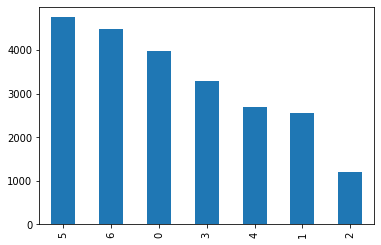

In [71]:
df['category'].value_counts().plot.bar()

In [129]:
class CatsAndDogsDataset(Dataset):
    def __init__(self, df, root_dir, transform=None):
        self.annotations = df
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        #print ( index ) 
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index,0])
        image = cv2.imread(img_path , 0 )
        y_label = torch.tensor(int(self.annotations.iloc[index,1]))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)
        

In [125]:
# hyper parameters
in_channel = 1
num_classes = 2
learning_rate = 0.001
batch_size = 100
num_epochs = 10

In [136]:
data_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(26),
    #transforms.ColorJitter(),
    #transforms.RandomCrop(224),
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

In [137]:
# Load data
dataset = CatsAndDogsDataset(df = df, root_dir = './../data/raw/', transform = data_transform)
print ( len ( dataset ))
train_set, val_set = torch.utils.data.random_split(dataset, [22961-500, 500])
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_set)

22961


In [138]:
print ( len ( train_loader )) 
for batch_idx, (data, targets) in enumerate(train_loader):
    # get data to cuda
    data = data.to(device)
    targets = targets.to(device)
    print ( data.shape ) 
    break 

230
torch.Size([100, 1, 26, 26])
